# importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import shuffle

# Data preprocessing

In [45]:
file_path = 'twitter_training.csv'
df = pd.read_csv(file_path, header=None)

In [46]:
df.columns=["id","entity","target","content"]

In [47]:
df

,id,entity,target,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df["target"]=df["target"].str.replace('Positive',"1")
df["target"]=df["target"].str.replace('Negative',"0")
df["target"]=df["target"].str.replace('Neutral',"3")
df["target"]=df["target"].str.replace('Irrelevant',"4")

In [5]:
df["target"].astype(int)

0        1
1        1
2        1
3        1
4        1
        ..
74677    1
74678    1
74679    1
74680    1
74681    1
Name: target, Length: 74682, dtype: int32

<AxesSubplot:>

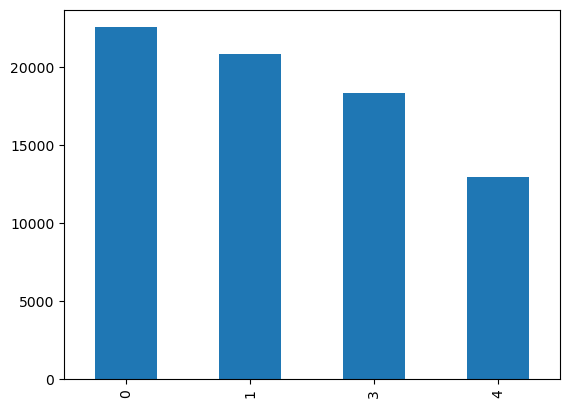

In [6]:
df["target"].value_counts().plot.bar()

In [7]:
df=df[["target","content"]]

In [8]:
df

,target,content
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
74677,1,Just realized that the Windows partition of my...
74678,1,Just realized that my Mac window partition is ...
74679,1,Just realized the windows partition of my Mac ...
74680,1,Just realized between the windows partition of...


In [9]:
df.isna().sum()

target       0
content    686
dtype: int64

In [10]:
df.dropna()

,target,content
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
74677,1,Just realized that the Windows partition of my...
74678,1,Just realized that my Mac window partition is ...
74679,1,Just realized the windows partition of my Mac ...
74680,1,Just realized between the windows partition of...


In [11]:
def text_processing(content):
    content=str(content).split(" ")
    temp=[]
    for i in content:
        if i.isalpha():
            temp.append(i)
    return " ".join(temp)
            

In [12]:
df["content"]=df["content"].apply(text_processing)

In [13]:
df=df.sample(frac=1)

In [14]:
df

,target,content
65993,3,Johnson from Johnson heart has made a big deal...
30594,0,please fix your matchmaking and reports i just...
64618,0,I won would t believe it til soon i see
71652,0,Why is the estimated time for Ghost War always...
4716,3,Thanks for entering Grand Summoners Watch the ...
...,...,...
13783,0,I get your next game came but now my mycareer ...
50417,0,I was really excited for the new FIFA but lite...
30135,3,Yo these roads are bumpy awww Damn what will we
52910,3,LIVE NOW


# Spliting the train and Test Data

In [15]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [16]:
train_df

,target,content
46395,0,What is going on with The last several days mo...
30943,1,My neon happy with the old photo and already m...
69334,1,Shared services via Microsoft software Edge Cy...
71509,3,make my dreams come you make my dreams come Hall
62498,1,I like the gta Masters and formel e and formul...
...,...,...
17210,3,the first L I saw would probably have been har...
34931,4,Very good of you to remind I thought it said G...
12220,1,This game was a pretty fun Guinness record to ...
38863,0,Only quests to complete in HS until they fix t...


In [17]:
test_df

,target,content
905,1,Atleast I have Borderlands can cheer everythin...
19329,3,I just scored the Most Horrific Vision of
56850,0,Servers still lagging and costing us ranked I ...
54054,0,My first game of Gunfight was too
53799,4,Come watch my buddy Vinny and I for some bad g...
...,...,...
21032,1,Fuck final fantasy World of warcraft is still ...
31760,3,riotgames LeagueOfLegends man so glad you ban ...
67174,3,Royal Johnson Johnson UK Halting Sale Of C Tal...
45425,1,We


 # NLP Method 

In [18]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(train_df['content'])
X_test = vectorizer.transform(test_df['content'])
y_train = train_df['target']
y_test = test_df['target']


In [19]:
X_train

<59745x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 360485 stored elements in Compressed Sparse Row format>

# Training The Data

In [20]:
pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [21]:
param_grid = {
    'tfidfvectorizer__max_features': [5000, 10000, 20000],
    'multinomialnb__alpha': [0.1, 0.5, 1.0]
}

In [22]:
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(train_df['content'], y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'multinomialnb__alpha': [0.1, 0.5, 1.0],
                         'tfidfvectorizer__max_features': [5000, 10000, 20000]})

In [23]:
best_model = grid.best_estimator_

In [24]:
best_model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=20000)),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [25]:
y_pred = best_model.predict(test_df['content'])

In [26]:
best_model.score(test_df['content'],y_test)

0.7242418156256276

In [27]:
test_df['content']

905      Atleast I have Borderlands can cheer everythin...
19329            I just scored the Most Horrific Vision of
56850    Servers still lagging and costing us ranked I ...
54054                    My first game of Gunfight was too
53799    Come watch my buddy Vinny and I for some bad g...
                               ...                        
21032    Fuck final fantasy World of warcraft is still ...
31760    riotgames LeagueOfLegends man so glad you ban ...
67174    Royal Johnson Johnson UK Halting Sale Of C Tal...
45425                                                   We
68564                             we wait until ridiculous
Name: content, Length: 14937, dtype: object

# Confusion Matrix

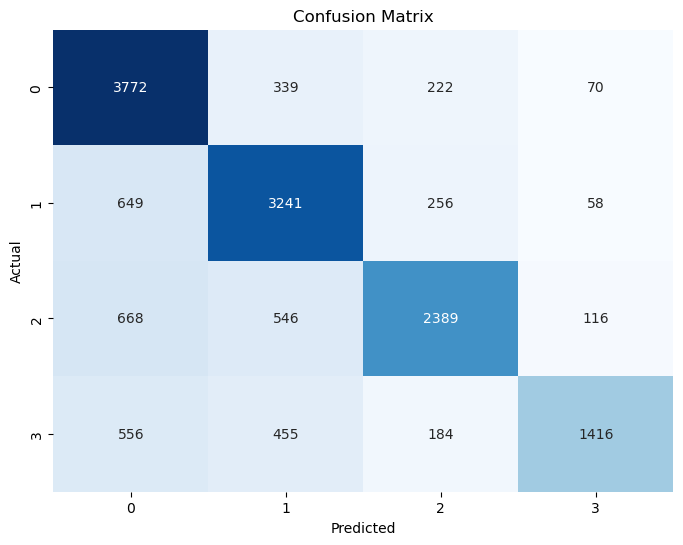

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
y_pred.size

14937

# OutPut Of The Model


In [30]:
best_model.predict(["i love this thing a lot"])

array(['1'], dtype='<U1')

In [31]:
best_model.predict(["i hate this thing a lot"])

array(['0'], dtype='<U1')

In [51]:
best_model.predict(["nan"])

array(['3'], dtype='<U1')

# saving The Training Model

In [33]:
import pickle

In [34]:
pickle.dump(best_model,open("sentimentAnalysis.pkl","wb"))

In [35]:
model=pickle.load(open("sentimentAnalysis.pkl","rb"))

In [36]:
model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=20000)),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

<AxesSubplot:xlabel='0'>

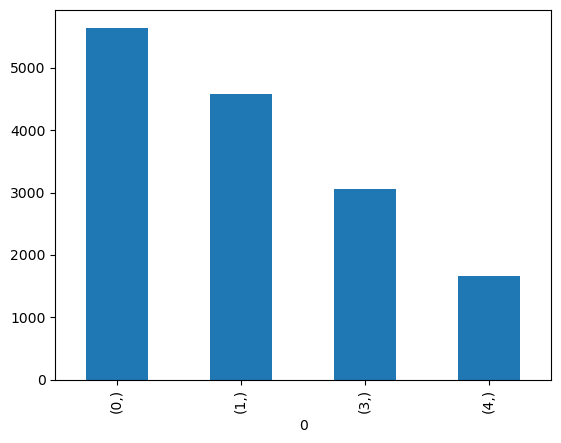

In [40]:
pd.DataFrame(y_pred).value_counts().plot.bar()

In [55]:
def con(n):
    if n[0]==1: 
        return "Positive"
    if n[0]==0: 
        return "negative"
    if n[0]==2: 
        return "neutral"
    if n[0]==3: 
        return "Irrelant"
    return " "
    

In [56]:
a="love"

In [57]:
con(best_model.predict([a]))

' '

In [59]:
 best_model.predict([a])[0]

'1'